In [1]:
import osmnx as ox
import geopandas as gpd
import pandas as pd
import networkx as nx

In [2]:
pop = pd.read_csv('population-density-by-city (1).csv')

In [3]:
pop.head()

,Entity,Code,Year,Population density by city
0,Abidjan,NaN,2014,14700
1,Accra,NaN,2014,4300
2,Ahmedabad,NaN,2014,19800
3,Alexandria,NaN,2014,15600
4,Ankara,NaN,2014,6500


## Plotting Routes

In [18]:
G = ox.graph_from_address('Tokyo', network_type='all')

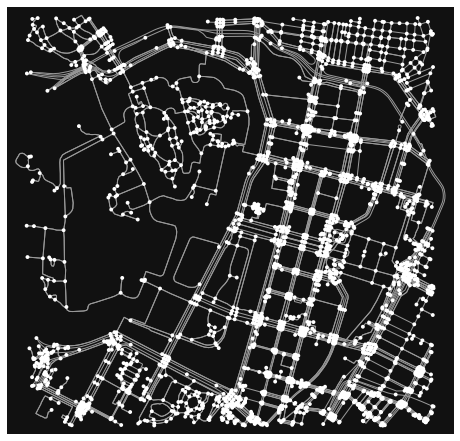

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [20]:
ox.plot_graph(G)

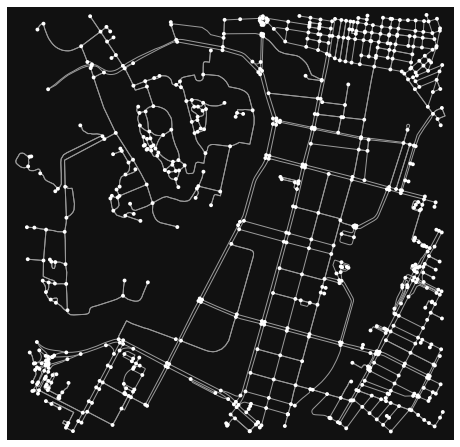

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [50]:
F = ox.graph_from_address('Tokyo', network_type='bike')
ox.plot_graph(F)

## Metric 1: Proportion of Bike routes

In [12]:
route_prop_2 = []
for e in list(pop.Entity)[47:]:
    if ox.graph_from_address(e, network_type='all') != None:
        G = ox.graph_from_address(e, network_type='all')
        F = ox.graph_from_address(e, network_type='bike')
        route_prop_2.append(ox.stats.edge_length_total(F) / ox.stats.edge_length_total(G))
        print(e,ox.stats.edge_length_total(F) / ox.stats.edge_length_total(G))
    else:
        route_prop.append(0)
        print(0)

Kyoto 0.5527451365134809
Lagos 0.894146926055253
Lahore 0.9677946446241307
Lima 0.5821531609653834
London 0.5498981537097553
Los Angeles 0.4890996086871755
Luanda 0.9539140120046733
Madrid 0.6164922460536832
Manila 0.7769174564920596
Medan 0.9646136703302544
Melbourne 0.45777390028382303
Mexico City 0.9189398327169694
Miami 0.5698866062532625
Milan 0.28800607198534045


EmptyOverpassResponse: There are no data elements in the response JSON

In [13]:
route_prop = route_prop + [0] + route_prop_2

In [17]:
# divided by population density:

In [19]:
pop = pop.rename(columns = {'Population density by city':'Density'})

In [44]:
pop_prop = [r/i for r,i in zip(route_prop,pop.Density[:59])]

In [45]:
len(pop_prop)

59

In [46]:
metrics_df = pd.DataFrame(data = {'Name':pop.Entity[:59], 'M1':route_prop, 'M2':pop_prop})

In [47]:
metrics_df.to_csv('M.csv', index = False)

In [48]:
metrics_df.head()

,Name,M1,M2
0,Abidjan,0.889902,0.000061
1,Accra,0.925752,0.000215
2,Ahmedabad,0.987791,0.000050
3,Alexandria,0.931898,0.000060
4,Ankara,0.881932,0.000136


In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Kinshasa'),
  Text(1, 0, 'Dongguan'),
  Text(2, 0, 'Bandung'),
  Text(3, 0, 'Dar es Salaam'),
  Text(4, 0, 'Karachi'),
  Text(5, 0, 'Ahmedabad'),
  Text(6, 0, 'Khartoum'),
  Text(7, 0, 'Hyderabad'),
  Text(8, 0, 'Busan'),
  Text(9, 0, 'Chennai'),
  Text(10, 0, 'Kyoto'),
  Text(11, 0, 'Madrid'),
  Text(12, 0, 'London'),
  Text(13, 0, 'Delhi'),
  Text(14, 0, 'Dhaka'),
  Text(15, 0, 'Hangzhou'),
  Text(16, 0, 'Alexandria'),
  Text(17, 0, 'Accra'),
  Text(18, 0, 'Medan'),
  Text(19, 0, 'Guadalajara')])

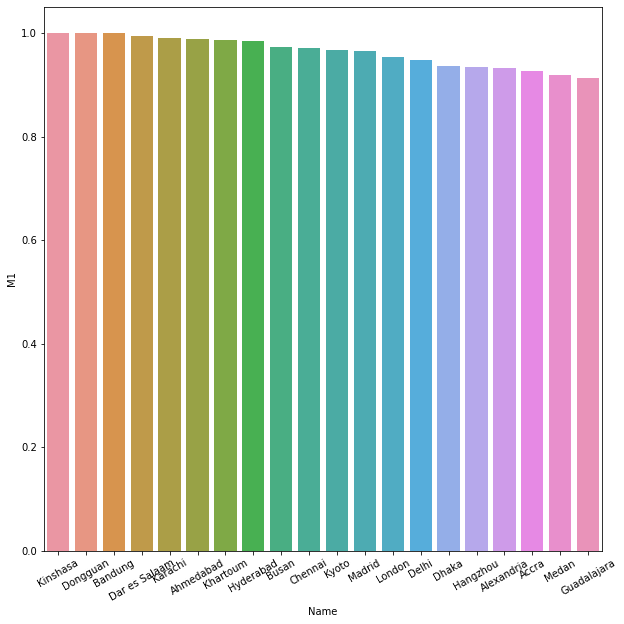

In [50]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x="Name", y="M1", data=metrics_df.sort_values('M1', ascending = False).head(20))
plt.xticks(rotation=30, horizontalalignment="center")

In [ ]:
# how spread out are the bike routes

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'Atlanta'),
  Text(1, 0, 'Houston'),
  Text(2, 0, 'Dallas'),
  Text(3, 0, 'Melbourne'),
  Text(4, 0, 'Boston'),
  Text(5, 0, 'Chicago'),
  Text(6, 0, 'Johannesburg'),
  Text(7, 0, 'Los Angeles'),
  Text(8, 0, 'Essen'),
  Text(9, 0, 'Accra'),
  Text(10, 0, 'Belo Horizonte'),
  Text(11, 0, 'Madrid'),
  Text(12, 0, 'Dongguan'),
  Text(13, 0, 'Khartoum'),
  Text(14, 0, 'Kyoto'),
  Text(15, 0, 'Dalian'),
  Text(16, 0, 'Hangzhou'),
  Text(17, 0, 'London'),
  Text(18, 0, 'Kuwait'),
  Text(19, 0, 'Kuala Lumpur')])

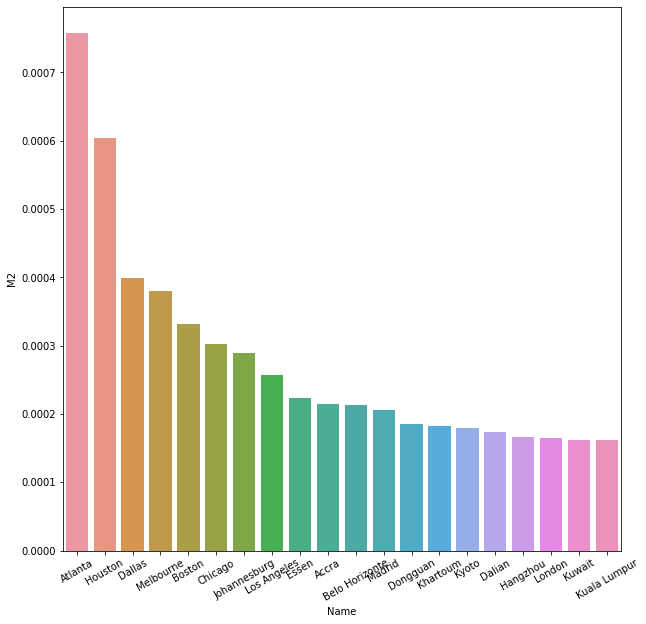

In [51]:
fig, ax = plt.subplots(figsize = (10,10))
ax = sns.barplot(x="Name", y="M2", data=metrics_df.sort_values('M2', ascending =False).head(20))
plt.xticks(rotation=30, horizontalalignment="center")

In [68]:
ox.stats.basic_stats(ox.graph_from_address('Atlanta', network_type='bike'))

{'n': 1154,
 'm': 2821,
 'k_avg': 4.889081455805893,
 'edge_length_total': 155815.66900000043,
 'edge_length_avg': 55.234196738745275,
 'streets_per_node_avg': 2.8110918544194106,
 'streets_per_node_counts': {0: 0, 1: 195, 2: 18, 3: 756, 4: 180, 5: 5},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.16897746967071056,
  2: 0.01559792027729636,
  3: 0.6551126516464472,
  4: 0.1559792027729636,
  5: 0.004332755632582322},
 'intersection_count': 959,
 'street_length_total': 89549.3449999999,
 'street_segment_count': 1587,
 'street_length_avg': 56.42680844360422,
 'circuity_avg': 1.1025493433154676,
 'self_loop_proportion': 0.010081915563957152}

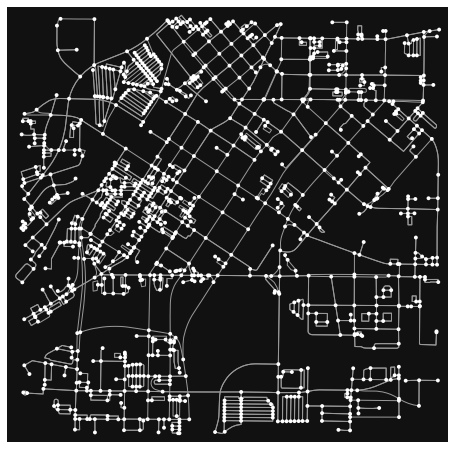

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [70]:
ox.plot_graph(ox.graph_from_address('Atlanta', network_type='bike'))

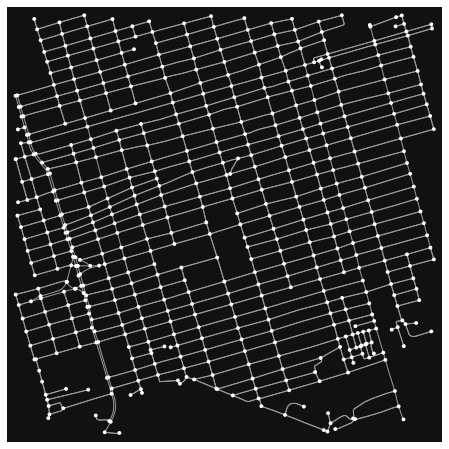

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [71]:
ox.plot_graph(ox.graph_from_address('Kinshasa', network_type='bike'))

In [72]:
ox.stats.basic_stats(ox.graph_from_address('Kinshasa', network_type='bike'))

{'n': 550,
 'm': 1738,
 'k_avg': 6.32,
 'edge_length_total': 158018.45100000015,
 'edge_length_avg': 90.9197071346376,
 'streets_per_node_avg': 3.58,
 'streets_per_node_counts': {0: 0, 1: 24, 2: 1, 3: 157, 4: 368},
 'streets_per_node_proportions': {0: 0.0,
  1: 0.04363636363636364,
  2: 0.0018181818181818182,
  3: 0.28545454545454546,
  4: 0.6690909090909091},
 'intersection_count': 526,
 'street_length_total': 82933.05900000024,
 'street_segment_count': 937,
 'street_length_avg': 88.50913447171851,
 'circuity_avg': 1.0035814627556876,
 'self_loop_proportion': 0.0}

In [74]:
k = ox.stats.basic_stats(ox.graph_from_address('Atlanta', network_type='bike')).keys()

In [78]:
alt_vals = ox.stats.basic_stats(ox.graph_from_address('Atlanta', network_type='bike')).values()

In [79]:
k_vals = ox.stats.basic_stats(ox.graph_from_address('Kinshasa', network_type='bike')).values()

In [80]:
alt_k = pd.DataFrame(data = {'Metrics':list(k), 'Atlanta':alt_vals, 'Kinshasa':k_vals})

In [82]:
alt_k.head(15)

,Metrics,Atlanta,Kinshasa
0,n,1154,550
1,m,2821,1738
2,k_avg,4.889081,6.32
3,edge_length_total,155815.669,158018.451
4,edge_length_avg,55.234197,90.919707
5,streets_per_node_avg,2.811092,3.58
6,streets_per_node_counts,"{0: 0, 1: 195, 2: 18, 3: 756, 4: 180, 5: 5}","{0: 0, 1: 24, 2: 1, 3: 157, 4: 368}"
7,streets_per_node_proportions,"{0: 0.0, 1: 0.16897746967071056, 2: 0.01559792...","{0: 0.0, 1: 0.04363636363636364, 2: 0.00181818..."
8,intersection_count,959,526
9,street_length_total,89549.345,82933.059
